In [245]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/Bakery sales.csv")

# Pre-procesamiento

In [246]:
# Mostrar primer mes y ultimo mes
print(f"El dataset comienza en {df['date'].min()} y termina en {df['date'].max()}")

# Borrar todas las filas donde la columna 'article' no tenga más de 2 caracteres
df = df[df['article'].str.len() > 2]

# Convertir la columna 'unit_price' a float
df["unit_price"] = df["unit_price"].str.replace(" €", "").str.replace(",", ".").astype(float)

# Asegurarse que los nombres de los artículos estén en mayusculas
df["article"] = df["article"].str.upper()

# Mostrar las primeras filas del DataFrame resultante
df

El dataset comienza en 2021-01-02 y termina en 2022-09-30


Unnamed: 0        date   time  ticket_number               article  \
0                0  2021-01-02  08:38       150040.0              BAGUETTE   
1                1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2                4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3                5  2021-01-02  09:14       150041.0                  PAIN   
4                8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   
...            ...         ...    ...            ...                   ...   
234000      511387  2022-09-30  18:52       288911.0                 COUPE   
234001      511388  2022-09-30  18:52       288911.0            BOULE 200G   
234002      511389  2022-09-30  18:52       288911.0                 COUPE   
234003      511392  2022-09-30  18:55       288912.0  TRADITIONAL BAGUETTE   
234004      511395  2022-09-30  18:56       288913.0  TRADITIONAL BAGUETTE   

        Quantity  unit_price  
0            1.0        0.90  
1            3.0        1.20  
2            2.0        1.20  
3            1.0        1.15  
4            5.0        1.20  
...          ...         ...  
234000       1.0        0.15  
234001       1.0        1.20  
234002       2.0        0.15  
234003       1.0        1.30  
234004       1.0        1.30  

[234000 rows x 7 columns]

# Clasificación de productos

## Analisis ABC

In [247]:
# Calcular la demanda valorizada = Quantity * unit_price
df_abc = df.copy()

df_abc["DemandaValorizada"] = df["Quantity"] * df["unit_price"]

# ordenar el DataFrame por la nueva columna, de forma descendente
ddf_abcf = df_abc.sort_values(by="DemandaValorizada", ascending=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
df_abc.head()

Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity  unit_price  DemandaValorizada  
0       1.0        0.90               0.90  
1       3.0        1.20               3.60  
2       2.0        1.20               2.40  
3       1.0        1.15               1.15  
4       5.0        1.20               6.00

In [248]:
# Agrupar los prudctos por artículo y sumar la demanda valorizada
df_abc = df_abc.groupby("article")["DemandaValorizada"].sum().reset_index()
df_abc = df_abc.sort_values(by="DemandaValorizada", ascending=False)

df_abc.head()


article  DemandaValorizada
139  TRADITIONAL BAGUETTE          144756.05
56       FORMULE SANDWICH           34710.50
31              CROISSANT           33579.50
84       PAIN AU CHOCOLAT           31100.45
6                 BANETTE           24555.15

In [249]:
# Calcular la demanda valorizada porcentual
total = df_abc["DemandaValorizada"].sum()
df_abc["DemandaValorizadaPorcentual"] = df_abc["DemandaValorizada"] / total * 100

df_abc.head()

article  DemandaValorizada  DemandaValorizadaPorcentual
139  TRADITIONAL BAGUETTE          144756.05                    25.912185
56       FORMULE SANDWICH           34710.50                     6.213384
31              CROISSANT           33579.50                     6.010928
84       PAIN AU CHOCOLAT           31100.45                     5.567164
6                 BANETTE           24555.15                     4.395516

In [250]:
# Calcular la demanda valorizada porcentual acumulada respecto a la demanda valorizada
df_abc["DemandaValorizadaPorcentualAcumulada"] = df_abc["DemandaValorizadaPorcentual"].cumsum()

# Mostrar las primeras filas del DataFrame con la nueva columna
df_abc.head()

article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada  
139                             25.912185  
56                              32.125569  
31                              38.136497  
84                              43.703660  
6                               48.099177

In [251]:
# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_abc["Tipo"] = df_abc["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

# guardar
df_abc.to_csv("../results/Bakery sales pre-pivot-ABC.csv", index=False)

df_abc.head()

article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada Tipo  
139                             25.912185    A  
56                              32.125569    A  
31                              38.136497    A  
84                              43.703660    A  
6                               48.099177    A

## Analisis XYZ

In [252]:
# Analisis XYZ
# Calcular la columna "month" como "2021-01" es decir "año-mes"
df["year-month"] = df["date"].str[:7]

# guardar
df.to_csv("../results/Bakery sales pre-pivot-XYZ.csv", index=False)

# Para cada articulo calcular la demanda total (no valorizada) por mes
df_agrupado_mes = df.groupby(["article", "year-month"])["Quantity"].sum().reset_index()

# calculado manualmente con quantity > 1
#assert df_agrupado_mes[(df_agrupado_mes["article"] == "TROPEZIENNE") & (df_agrupado_mes["year-month"] == "2022-01")]["Quantity"].values[0] == 5

df_agrupado_mes.head()



article year-month  Quantity
0   12 MACARON    2022-07      14.0
1   12 MACARON    2022-08      47.0
2   12 MACARON    2022-09       9.0
3   ARMORICAIN    2022-07       3.0
4  ARTICLE 295    2021-11       1.0

In [253]:
# Rellenar los meses que faltan a cada articulo con 0
df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()

df_agrupado_mes


/home/ez/tmp/geckodriver/ipykernel_44432/576990396.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()


article year-month  Quantity
0     12 MACARON    2021-01       0.0
1     12 MACARON    2021-02       0.0
2     12 MACARON    2021-03       0.0
3     12 MACARON    2021-04       0.0
4     12 MACARON    2021-05       0.0
...          ...        ...       ...
3103   VIK BREAD    2022-05     159.0
3104   VIK BREAD    2022-06     114.0
3105   VIK BREAD    2022-07     363.0
3106   VIK BREAD    2022-08     378.0
3107   VIK BREAD    2022-09     118.0

[3108 rows x 3 columns]

In [254]:
# Pivotar el DataFrame para tener los meses como columnas
df_xyz = df_agrupado_mes.pivot(index="article", columns="year-month", values="Quantity").reset_index()

meses = df["year-month"].unique()

print(meses)

df_xyz

['2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02'
 '2022-03' '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09']


year-month                article  2021-01  2021-02  2021-03  2021-04  \
0                      12 MACARON      0.0      0.0      0.0      0.0   
1                      ARMORICAIN      0.0      0.0      0.0      0.0   
2                     ARTICLE 295      0.0      0.0      0.0      0.0   
3                        BAGUETTE    741.0    774.0    891.0    988.0   
4                  BAGUETTE APERO      1.0      3.0      3.0      4.0   
..                            ...      ...      ...      ...      ...   
143                   TROPEZIENNE      0.0      0.0     12.0     10.0   
144         TROPEZIENNE FRAMBOISE      0.0      0.0     13.0     15.0   
145                        TULIPE      0.0      0.0      0.0      0.0   
146                     VIENNOISE      0.0      0.0      0.0      0.0   
147                     VIK BREAD     96.0     85.0    118.0    152.0   

year-month  2021-05  2021-06  2021-07  2021-08  2021-09  ...  2021-12  \
0               0.0      0.0      0.0      0.0      0.0  ...      0.0   
1               0.0      0.0      0.0      0.0      0.0  ...      0.0   
2               0.0      0.0      0.0      0.0      0.0  ...      0.0   
3            1120.0   1036.0   1596.0   1966.0   1083.0  ...    755.0   
4               0.0      3.0      2.0      3.0      6.0  ...      5.0   
..              ...      ...      ...      ...      ...  ...      ...   
143            35.0     27.0     44.0     45.0     33.0  ...     11.0   
144             1.0      0.0      0.0      0.0      0.0  ...      0.0   
145             0.0      0.0      0.0      0.0      0.0  ...      0.0   
146             0.0      0.0     91.0    121.0      6.0  ...      0.0   
147           202.0    117.0    380.0    368.0    109.0  ...    202.0   

year-month  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  \
0               0.0      0.0      0.0      0.0      0.0      0.0     14.0   
1               0.0      0.0      0.0      0.0      0.0      0.0      3.0   
2               0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3             617.0    782.0    766.0    934.0   1059.0   1039.0   1741.0   
4               4.0      5.0      5.0      3.0      3.0      3.0      0.0   
..              ...      ...      ...      ...      ...      ...      ...   
143             5.0     25.0     27.0     22.0     18.0     13.0     41.0   
144             0.0      0.0      0.0      0.0      0.0      2.0      1.0   
145             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
146             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
147            83.0     87.0    102.0    146.0    159.0    114.0    363.0   

year-month  2022-08  2022-09  
0              47.0      9.0  
1               0.0      0.0  
2               0.0      0.0  
3            1580.0    778.0  
4               0.0      0.0  
..              ...      ...  
143            67.0     14.0  
144             0.0      0.0  
145             2.0      0.0  
146             0.0      0.0  
147           378.0    118.0  

[148 rows x 22 columns]

In [255]:
# Calcula el promedio de la demanda por articulo, la desviacion estandar y cuanto representa en %
# len(meses)+1 ya que comienza en 01 (i=1) y termina en 12 (i=13)
df_xyz["mean"] = df_xyz.iloc[:, 1:len(meses)+1].mean(axis=1)

df_xyz["std"] = df_xyz.iloc[:, 1:len(meses)+1].std(axis=1)

df_xyz["std%"] = df_xyz["std"] * 100 / df_xyz["mean"]

df_xyz

year-month                article  2021-01  2021-02  2021-03  2021-04  \
0                      12 MACARON      0.0      0.0      0.0      0.0   
1                      ARMORICAIN      0.0      0.0      0.0      0.0   
2                     ARTICLE 295      0.0      0.0      0.0      0.0   
3                        BAGUETTE    741.0    774.0    891.0    988.0   
4                  BAGUETTE APERO      1.0      3.0      3.0      4.0   
..                            ...      ...      ...      ...      ...   
143                   TROPEZIENNE      0.0      0.0     12.0     10.0   
144         TROPEZIENNE FRAMBOISE      0.0      0.0     13.0     15.0   
145                        TULIPE      0.0      0.0      0.0      0.0   
146                     VIENNOISE      0.0      0.0      0.0      0.0   
147                     VIK BREAD     96.0     85.0    118.0    152.0   

year-month  2021-05  2021-06  2021-07  2021-08  2021-09  ...  2022-03  \
0               0.0      0.0      0.0      0.0      0.0  ...      0.0   
1               0.0      0.0      0.0      0.0      0.0  ...      0.0   
2               0.0      0.0      0.0      0.0      0.0  ...      0.0   
3            1120.0   1036.0   1596.0   1966.0   1083.0  ...    766.0   
4               0.0      3.0      2.0      3.0      6.0  ...      5.0   
..              ...      ...      ...      ...      ...  ...      ...   
143            35.0     27.0     44.0     45.0     33.0  ...     27.0   
144             1.0      0.0      0.0      0.0      0.0  ...      0.0   
145             0.0      0.0      0.0      0.0      0.0  ...      0.0   
146             0.0      0.0     91.0    121.0      6.0  ...      0.0   
147           202.0    117.0    380.0    368.0    109.0  ...    102.0   

year-month  2022-04  2022-05  2022-06  2022-07  2022-08  2022-09         mean  \
0               0.0      0.0      0.0     14.0     47.0      9.0     3.333333   
1               0.0      0.0      0.0      3.0      0.0      0.0     0.142857   
2               0.0      0.0      0.0      0.0      0.0      0.0     0.047619   
3             934.0   1059.0   1039.0   1741.0   1580.0    778.0  1050.142857   
4               3.0      3.0      3.0      0.0      0.0      0.0     2.952381   
..              ...      ...      ...      ...      ...      ...          ...   
143            22.0     18.0     13.0     41.0     67.0     14.0    24.190476   
144             0.0      0.0      2.0      1.0      0.0      0.0     1.571429   
145             0.0      0.0      0.0      0.0      2.0      0.0     0.095238   
146             0.0      0.0      0.0      0.0      0.0      0.0    10.380952   
147           146.0    159.0    114.0    363.0    378.0    118.0   172.333333   

year-month         std        std%  
0            10.612885  318.386558  
1             0.654654  458.257569  
2             0.218218  458.257569  
3           365.562619   34.810751  
4             2.011870   68.143968  
..                 ...         ...  
143          16.738038   69.192675  
144           4.178175  265.883837  
145           0.436436  458.257569  
146          32.167493  309.870347  
147         104.622337   60.709286  

[148 rows x 25 columns]

In [256]:
# quitar los que su promedio sea menor a 1
df_xyz = df_xyz[df_xyz["mean"] > 1]

In [257]:
# simla: Asignar XYZ =SI(H3<=10%;"X";SI(H3<=25%;"Y";SI(H3>=25%;"Z")))
#X = 10
#Y = 25

# Un poco mas razonable al ajustar por temporadas sería que clase Y <= 50%?
X = 25
Y = 55

def asignar_xyz(valor):
    if valor <= X:
        return 'X'
    elif valor <= Y:
        return 'Y'
    else:
        return 'Z'
    
df_xyz["XYZ"] = df_xyz["std%"].apply(asignar_xyz)

# ordernar por desviacion estandar
df_xyz = df_xyz.sort_values(by="std%", ascending=True)

# guardar
df_xyz.to_csv("../results/Bakery sales XYZ.csv", index=False)

df_xyz

/home/ez/tmp/geckodriver/ipykernel_44432/2705476804.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz["XYZ"] = df_xyz["std%"].apply(asignar_xyz)


year-month           article  2021-01  2021-02  2021-03  2021-04  2021-05  \
7                  BANETTINE    113.0    120.0    139.0    149.0    141.0   
83                      PAIN     89.0     90.0    116.0    129.0    111.0   
20               CAFE OU EAU     67.0     63.0     85.0    107.0    105.0   
122         SANDWICH COMPLET     70.0     88.0    149.0    160.0    134.0   
28                   COMPLET    103.0    127.0    164.0    191.0    189.0   
..                       ...      ...      ...      ...      ...      ...   
88               PAIN DE MIE      0.0      0.0      0.0      5.0      0.0   
35            DELICETROPICAL      0.0      0.0      0.0      0.0      0.0   
9                  BOTTEREAU      0.0      0.0      0.0      0.0      0.0   
47                 ENTREMETS      0.0      0.0      0.0      0.0      0.0   
80              NID DE POULE      0.0      0.0      0.0     35.0      0.0   

year-month  2021-06  2021-07  2021-08  2021-09  ...  2022-04  2022-05  \
7             148.0    158.0    174.0    145.0  ...    156.0    155.0   
83            117.0    129.0    117.0    112.0  ...    118.0    121.0   
20             96.0    124.0    133.0     86.0  ...     81.0     99.0   
122           191.0    143.0    178.0    189.0  ...    152.0    182.0   
28            198.0    232.0    264.0    145.0  ...    184.0    182.0   
..              ...      ...      ...      ...  ...      ...      ...   
88              0.0      0.0      1.0      0.0  ...      0.0      0.0   
35              0.0     17.0     42.0      2.0  ...      0.0      0.0   
9               0.0      0.0      0.0      0.0  ...      0.0      0.0   
47              0.0      0.0      0.0      0.0  ...      0.0      0.0   
80              0.0      0.0      0.0      0.0  ...      0.0      0.0   

year-month  2022-06  2022-07  2022-08  2022-09        mean        std  \
7             150.0    226.0    239.0    138.0  147.238095  33.036199   
83            110.0    196.0    153.0     65.0  117.190476  26.673243   
20            104.0    120.0    117.0     61.0   92.571429  21.532699   
122           162.0    152.0    211.0    109.0  137.523810  41.557934   
28            160.0    257.0    263.0    133.0  168.333333  52.342462   
..              ...      ...      ...      ...         ...        ...   
88              0.0      0.0      0.0      0.0    1.904762   6.131107   
35              0.0      0.0      0.0      0.0    2.904762   9.694869   
9               0.0      0.0      0.0      0.0   18.523810  81.295522   
47              0.0      0.0      0.0      0.0    1.809524   8.292280   
80              0.0      0.0      0.0      0.0    1.666667   7.637626   

year-month        std%  XYZ  
7            22.437264    X  
83           22.760590    X  
20           23.260632    X  
122          30.218720    Y  
28           31.094532    Y  
..                 ...  ...  
88          321.883131    Z  
35          333.757770    Z  
9           438.870427    Z  
47          458.257569    Z  
80          458.257569    Z  

[110 rows x 26 columns]

In [258]:
# contar cuantos articulos hay de cada tipo
print( df_xyz["XYZ"].value_counts().reset_index())

  XYZ  count
0   Z     71
1   Y     36
2   X      3


In [259]:
# Crear la tabla final: articulo, tipo ABC, tipo XYZ
df_abc_xyz = pd.merge(df_abc, df_xyz[["article", "XYZ"]], on="article")

# eliminar columnas no necesarias
df_abc_xyz = df_abc_xyz.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada"])

# ordernar por A y luego por XYZ
df_abc_xyz = df_abc_xyz.sort_values(by=["Tipo", "XYZ"])

# guardar
df_abc_xyz.to_csv("../results/Bakery sales final.csv", index=False)

df_abc_xyz

article Tipo XYZ
0      TRADITIONAL BAGUETTE    A   Y
1          FORMULE SANDWICH    A   Y
2                 CROISSANT    A   Y
3          PAIN AU CHOCOLAT    A   Y
4                   BANETTE    A   Y
..                      ...  ...  ..
105             PAIN DE MIE    C   Z
106              BRIOCHETTE    C   Z
107   TROPEZIENNE FRAMBOISE    C   Z
108                MERINGUE    C   Z
109  ECLAIR FRAISE PISTACHE    C   Z

[110 rows x 3 columns]

## Serie de tiempo (clase A)

In [260]:
# Graficar las series de tiempo de los productos de la clase A
# agrupar por dia (si hay muchos 0 estamos complicados y se hace por semana para esos)
# calcular la nueva columna "day" y "week"
df["day"] = pd.to_datetime(df["date"]).dt.date

# calcular la demanda total por dia
df_agrupado_dia = df.groupby(["article", "day"])["Quantity"].sum().reset_index()

# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_abc[df_abc["Tipo"] == "A"]

# Filtrar los productos de la clase A que esten en XYZ X o Y
df_clase_A = df_clase_A[df_clase_A["article"].isin(df_xyz[df_xyz["XYZ"].isin(['X', 'Y'])]["article"])]

# contar cuantos productos de la clase A hay
print(f"Cantidad de articulos df_clase_A: ", df_clase_A["article"].nunique())

# unir los productos de la clase A con la demanda por dia
df_clase_A_dia = pd.merge(df_clase_A, df_agrupado_dia, on="article", how="left")

# contar cuantos productos de la clase A hay
print(f"Cantidad de articulos df_clase_A_dia: ", df_clase_A_dia["article"].nunique())

# quitar columnas innecesarias
df_clase_A_dia = df_clase_A_dia.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

print(df_clase_A_dia.head())

# pivotear el DataFrame
df_clase_A_dia_pivot = df_clase_A_dia.pivot(index="article", columns="day", values="Quantity").reset_index()

# rellenar los valores faltantes con 0
df_clase_A_dia_pivot = df_clase_A_dia_pivot.fillna(0)


# guardar
df_clase_A_dia_pivot.to_csv("../results/Bakery sales class A by day.csv", index=False)

df_clase_A_dia_pivot

Cantidad de articulos df_clase_A:  18
Cantidad de articulos df_clase_A_dia:  18
                article         day  Quantity
0  TRADITIONAL BAGUETTE  2021-01-02     128.0
1  TRADITIONAL BAGUETTE  2021-01-03     171.0
2  TRADITIONAL BAGUETTE  2021-01-04     128.0
3  TRADITIONAL BAGUETTE  2021-01-05      99.0
4  TRADITIONAL BAGUETTE  2021-01-07     109.0


day               article  2021-01-02  2021-01-03  2021-01-04  2021-01-05  \
0                BAGUETTE        46.0        35.0        30.0        29.0   
1                 BANETTE        40.0        35.0        24.0        26.0   
2              BOULE 400G        11.0        11.0         5.0         6.0   
3                CAMPAGNE        10.0         9.0         6.0         3.0   
4         CEREAL BAGUETTE        19.0        16.0         7.0         7.0   
5                 COMPLET        10.0         6.0         4.0         2.0   
6               CROISSANT        66.0        59.0        17.0        12.0   
7                  ECLAIR         0.0         0.0         0.0         0.0   
8            FINANCIER X5         1.0         0.0         0.0         0.0   
9        FORMULE SANDWICH         0.0         0.0         4.0        12.0   
10                MOISSON        10.0         6.0         1.0         6.0   
11       PAIN AU CHOCOLAT        48.0        45.0        17.0         6.0   
12           PAIN BANETTE         6.0         5.0         0.0         5.0   
13       SAND JB EMMENTAL         9.0         0.0         1.0         1.0   
14       SANDWICH COMPLET         2.0         0.0         4.0         5.0   
15          SPECIAL BREAD         8.0         7.0         7.0         7.0   
16             TARTELETTE         0.0         0.0         0.0         0.0   
17   TRADITIONAL BAGUETTE       128.0       171.0       128.0        99.0   

day  2021-01-07  2021-01-08  2021-01-09  2021-01-10  2021-01-11  ...  \
0          28.0        17.0        25.0        36.0        31.0  ...   
1          21.0        20.0        30.0        35.0        21.0  ...   
2           3.0         5.0         6.0         7.0         7.0  ...   
3           3.0         3.0         5.0         5.0         5.0  ...   
4           7.0         7.0        10.0         9.0         8.0  ...   
5           4.0         5.0         4.0         3.0         1.0  ...   
6          15.0        36.0        33.0        48.0        14.0  ...   
7           0.0         0.0         0.0         0.0         0.0  ...   
8           0.0         0.0         0.0         0.0         0.0  ...   
9           8.0         6.0         3.0         0.0         6.0  ...   
10          7.0         5.0         4.0         1.0         0.0  ...   
11         15.0        22.0        25.0        42.0        17.0  ...   
12          2.0         5.0         6.0         6.0         2.0  ...   
13          0.0         4.0         0.0         0.0         5.0  ...   
14          2.0         6.0         0.0         0.0         3.0  ...   
15          6.0         6.0         8.0         8.0         1.0  ...   
16          0.0         0.0         0.0         0.0         0.0  ...   
17        109.0        78.0       135.0       140.0        88.0  ...   

day  2022-09-21  2022-09-22  2022-09-23  2022-09-24  2022-09-25  2022-09-26  \
0          11.0        34.0        12.0        28.0        36.0        18.0   
1          17.0        30.0        30.0        30.0        30.0        30.0   
2           4.0         2.0         6.0         4.0        14.0         4.0   
3           4.0         2.0         3.0         5.0        10.0         3.0   
4           4.0         6.0         8.0         7.0        10.0         8.0   
5           4.0         4.0         4.0         4.0         4.0         4.0   
6          19.0        29.0        28.0        43.0        91.0        26.0   
7           0.0         1.0         0.0         8.0        13.0         0.0   
8           1.0         1.0         0.0         3.0         0.0         0.0   
9          12.0         8.0         5.0         5.0         0.0         6.0   
10          3.0         5.0         4.0         6.0         6.0         6.0   
11         23.0        23.0        38.0        38.0        62.0        22.0   
12          4.0         3.0         5.0         5.0         5.0         3.0   
13          4.0         8.0         4.0         0.0         0

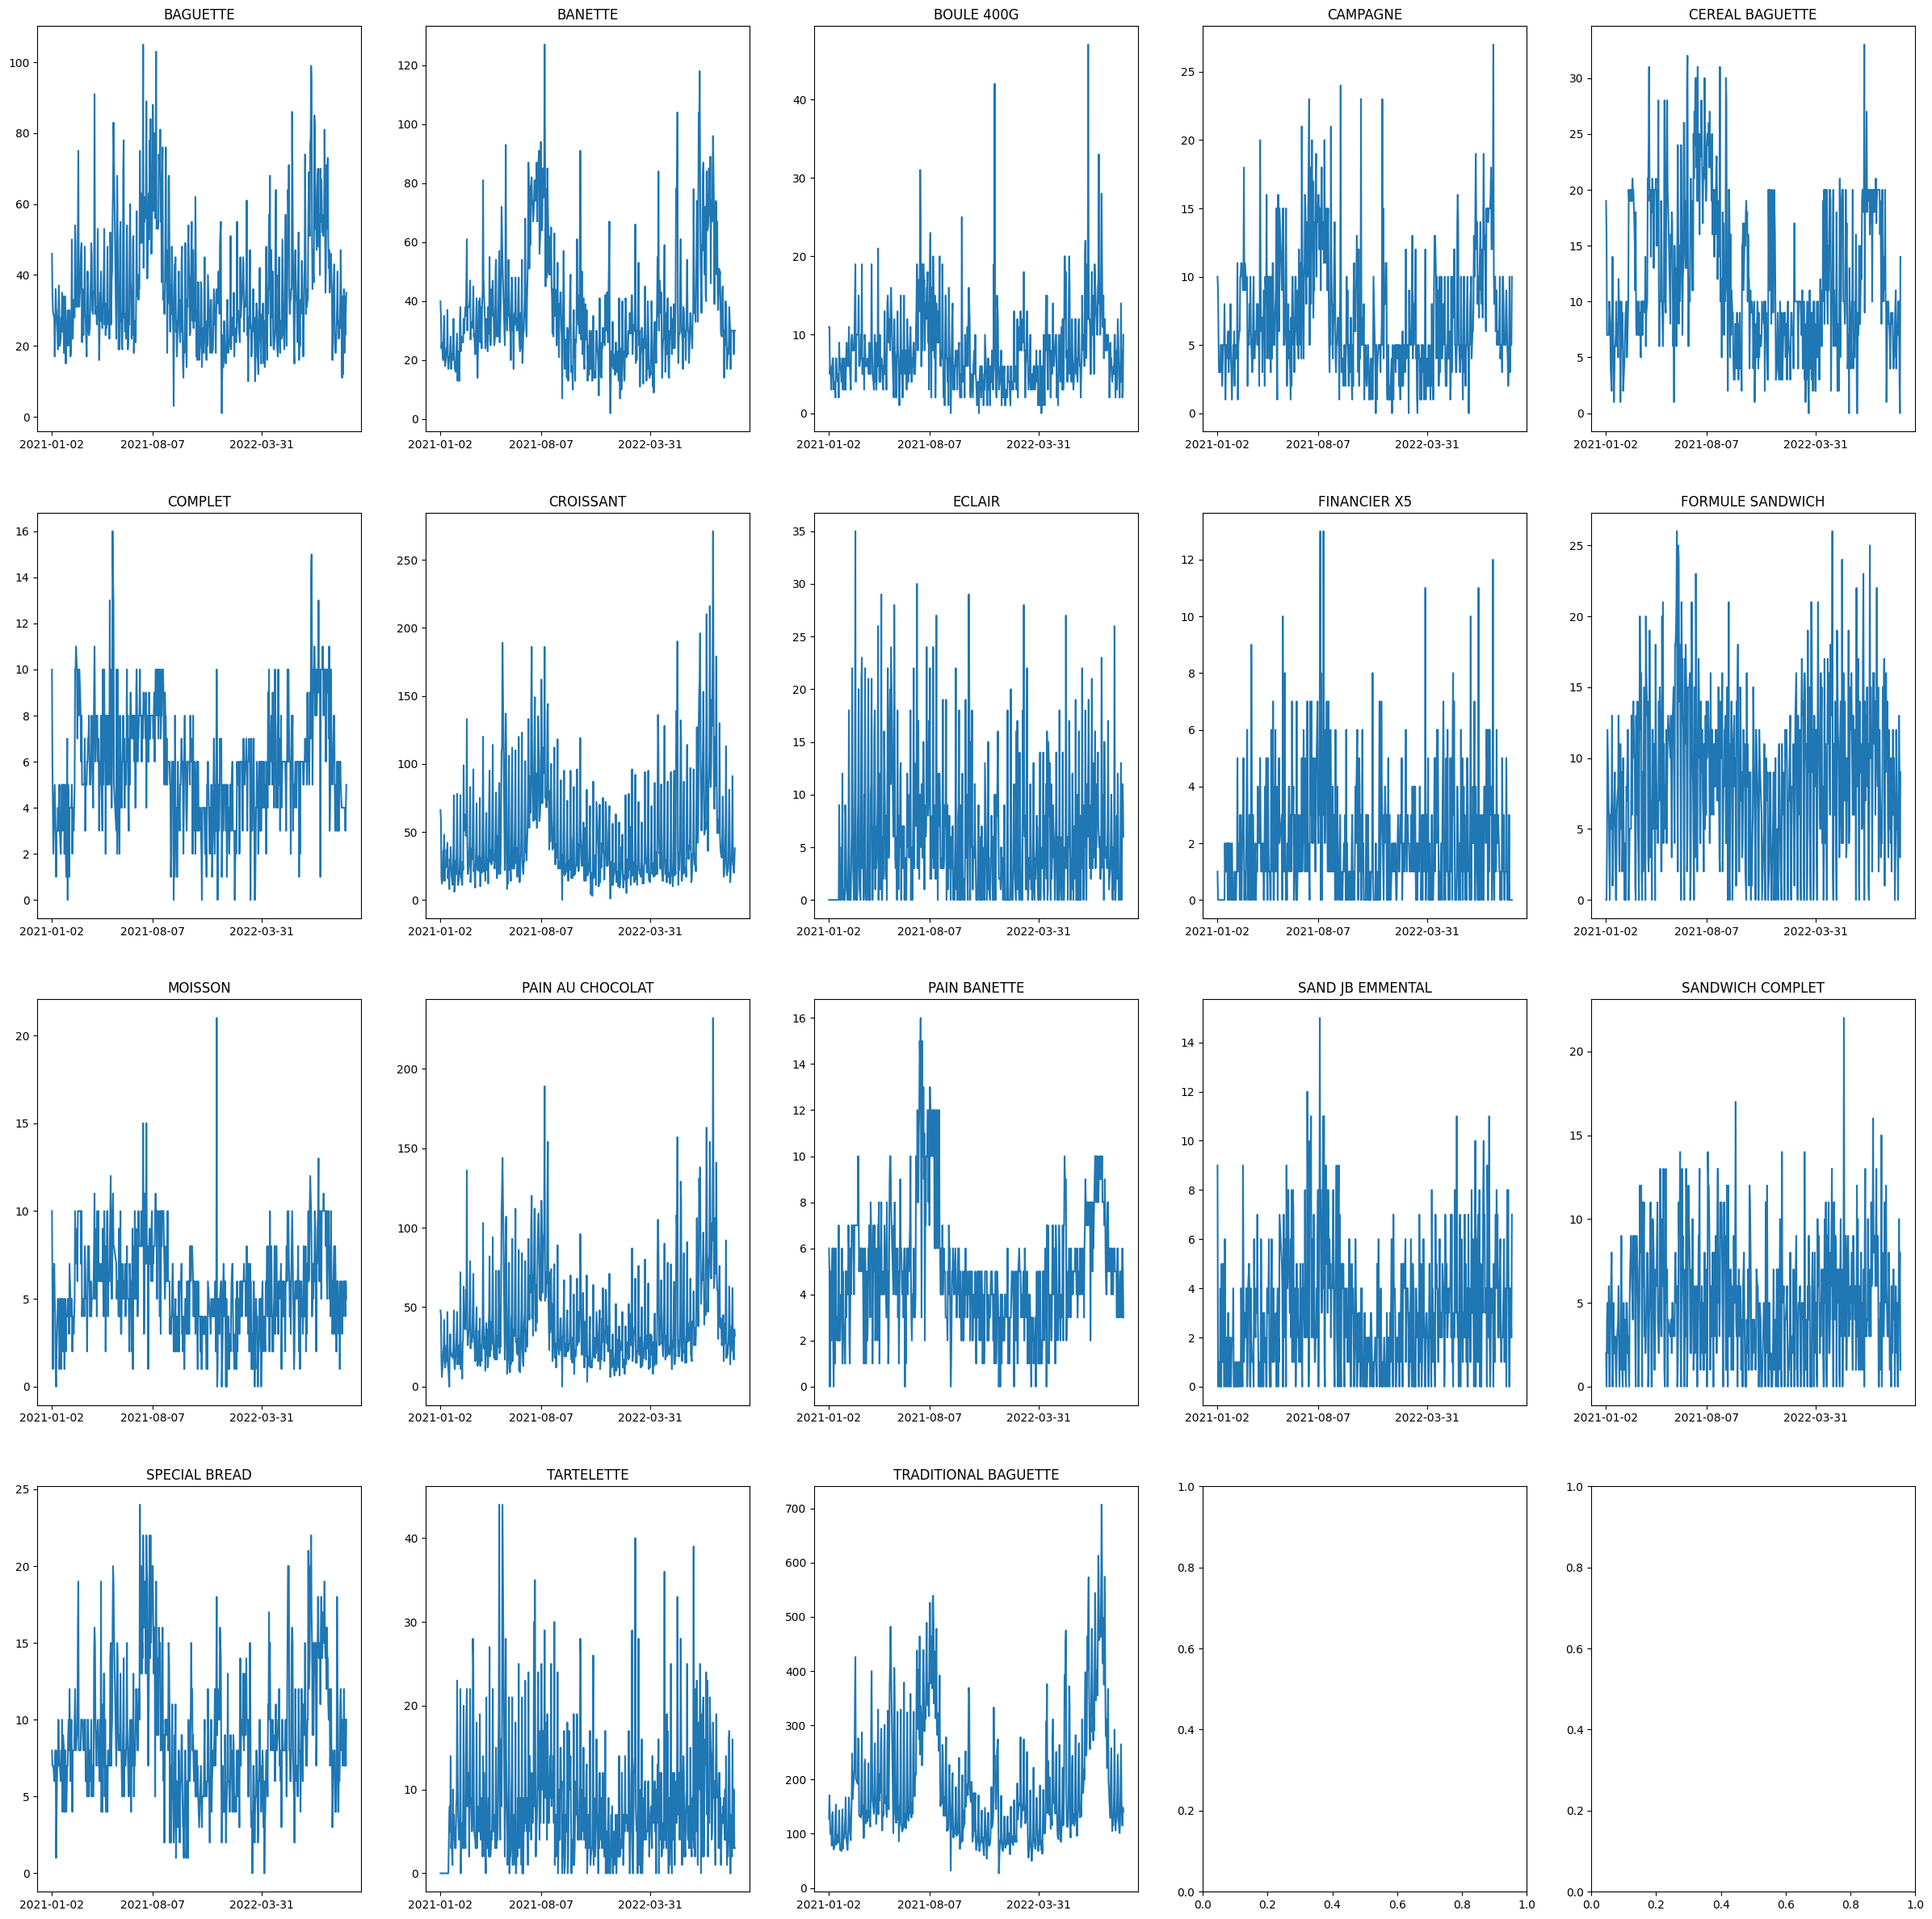

In [261]:
import math
import matplotlib.pyplot as plt

total_articulos = len(df_clase_A_dia_pivot)
n_c = 5
n_f = math.ceil(total_articulos / n_c)

fig, axs = plt.subplots(n_f, n_c, figsize=(30,30))

for i in range(0, len(df_clase_A_dia_pivot)):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])
    ax.set_xticks([df_clase_A_dia_pivot.columns[1], df_clase_A_dia_pivot.columns[len(df_clase_A_dia_pivot.columns)//3], '2022-03-31'])
    ax.set_xticklabels([df_clase_A_dia_pivot.columns[1], df_clase_A_dia_pivot.columns[len(df_clase_A_dia_pivot.columns)//3], '2022-03-31'])
    ax.set_title(df_clase_A_dia_pivot.iloc[i, 0])

plt.show()

# Ingredientes

In [262]:
# agrupar por "date", sumando la demanda total de ese dia
df_agrupado_date = df.groupby(["article", "date"])["Quantity"].sum().reset_index()

df_clase_A_date = pd.merge(df_clase_A[["article"]], df_agrupado_date, on="article", how="left")

print(df_clase_A_date.head())

# Para facilitar la busqueda:
# Ahora hacemos otro dataframe con un indice en date y las columnas son las "Quantity" de articulos
df_clase_A_date = df_clase_A_date.pivot(index="date", columns="article", values="Quantity")

df_clase_A_date.fillna(0, inplace=True)

df_clase_A_date.head()

                article        date  Quantity
0  TRADITIONAL BAGUETTE  2021-01-02     128.0
1  TRADITIONAL BAGUETTE  2021-01-03     171.0
2  TRADITIONAL BAGUETTE  2021-01-04     128.0
3  TRADITIONAL BAGUETTE  2021-01-05      99.0
4  TRADITIONAL BAGUETTE  2021-01-07     109.0


article     BAGUETTE  BANETTE  BOULE 400G  CAMPAGNE  CEREAL BAGUETTE  COMPLET  \
date                                                                            
2021-01-02      46.0     40.0        11.0      10.0             19.0     10.0   
2021-01-03      35.0     35.0        11.0       9.0             16.0      6.0   
2021-01-04      30.0     24.0         5.0       6.0              7.0      4.0   
2021-01-05      29.0     26.0         6.0       3.0              7.0      2.0   
2021-01-07      28.0     21.0         3.0       3.0              7.0      4.0   

article     CROISSANT  ECLAIR  FINANCIER X5  FORMULE SANDWICH  MOISSON  \
date                                                                     
2021-01-02       66.0     0.0           1.0               0.0     10.0   
2021-01-03       59.0     0.0           0.0               0.0      6.0   
2021-01-04       17.0     0.0           0.0               4.0      1.0   
2021-01-05       12.0     0.0           0.0              12.0      6.0   
2021-01-07       15.0     0.0           0.0               8.0      7.0   

article     PAIN AU CHOCOLAT  PAIN BANETTE  SAND JB EMMENTAL  \
date                                                           
2021-01-02              48.0           6.0               9.0   
2021-01-03              45.0           5.0               0.0   
2021-01-04              17.0           0.0               1.0   
2021-01-05               6.0           5.0               1.0   
2021-01-07              15.0           2.0               0.0   

article     SANDWICH COMPLET  SPECIAL BREAD  TARTELETTE  TRADITIONAL BAGUETTE  
date                                                                           
2021-01-02               2.0            8.0         0.0                 128.0  
2021-01-03               0.0            7.0         0.0                 171.0  
2021-01-04               4.0            7.0         0.0                 128.0  
2021-01-05               5.0            7.0         0.0                  99.0  
2021-01-07               2.0            6.0         0.0                 109.0

In [263]:
# Load the ingredients CSV file
df_ingredientes = pd.read_csv("../data/Ingredientes productos (A) - Ingredientes.csv", index_col=0)

# Eliminar columna Unidad
df_ingredientes = df_ingredientes.drop(columns=["Unidad"])

#print("DF INGREDIENTE\n\n:", df_ingredientes.head())

#print(df_clase_A_date.info())

# interseccion de los nombres de articulos A y los nombre de articulos que aparecen en df_ingredientes
result = set(df_clase_A_date.columns) & set(df_ingredientes.columns)
print("\n\nTEST NOMBRES 1: ", result)

# convertir los todos los nombres de los articulos al mismo case en ambos dataframe
df_ingredientes.columns = df_ingredientes.columns.str.upper()

if len(set(df_clase_A_date.columns) - set(df_ingredientes.columns)) > 0:
    print(f"Faltan los ingredientes de los siguientes articulos: {set(df_clase_A_date.columns) - set(df_ingredientes.columns)}")

# quitar los articulos de df_ingredientes que no sean clase A
df_ingredientes = df_ingredientes.drop(columns=set(df_ingredientes.columns) - set(df_clase_A_date.columns))

# repetir el experimento y debe dar la cantidad que hay en A
result = set(df_clase_A_date.columns) & set(df_ingredientes.columns)
print("TEST NOMBRES 2: ", len(result),result)

df_ingredientes = df_ingredientes.T

df_ingredientes



TEST NOMBRES 1:  set()
TEST NOMBRES 2:  18 {'SAND JB EMMENTAL', 'BOULE 400G', 'PAIN AU CHOCOLAT', 'TARTELETTE', 'CROISSANT', 'CEREAL BAGUETTE', 'CAMPAGNE', 'ECLAIR', 'PAIN BANETTE', 'BAGUETTE', 'BANETTE', 'SPECIAL BREAD', 'FINANCIER X5', 'MOISSON', 'TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'COMPLET', 'SANDWICH COMPLET'}


Ingrediente           Harina de trigo  Sal  Levadura  Mantequilla  Azúcar  \
TRADITIONAL BAGUETTE              500   10         5            0       0   
FORMULE SANDWICH                  300    5         5            0      10   
CROISSANT                         250    5         0          150      20   
PAIN AU CHOCOLAT                  250    5         0          150       0   
BANETTE                           500   10         5            0       0   
BAGUETTE                          500   10         5            0       0   
SANDWICH COMPLET                  250    3         2           50      10   
SPECIAL BREAD                     400   10        10          100      30   
TARTELETTE                        150    2         0           50      50   
CEREAL BAGUETTE                   500   10         5            0       0   
CAMPAGNE                          500   10         5            0       0   
BOULE 400G                        400   10         5            0       0   
ECLAIR                            100    3         0          100      50   
MOISSON                           500   10         5           50      20   
SAND JB EMMENTAL                  300    3         0           20      10   
COMPLET                           400   10         5           50      10   
PAIN BANETTE                      500   10         5            0       0   
FINANCIER X5                      200    2         0          150      50   

Ingrediente           Chocolate  Emmental  Pasas  Leche  
TRADITIONAL BAGUETTE          0         0      0      0  
FORMULE SANDWICH              0         0      0     50  
CROISSANT                     0         0      0     20  
PAIN AU CHOCOLAT            100         0      0     20  
BANETTE                       0         0      0      0  
BAGUETTE                      0         0      0      0  
SANDWICH COMPLET              0         0      0      0  
SPECIAL BREAD                 0         0      0     50  
TARTELETTE                    0         0      0     50  
CEREAL BAGUETTE               0         0      0      0  
CAMPAGNE                      0         0      0      0  
BOULE 400G                    0         0      0      0  
ECLAIR                       50         0      0     50  
MOISSON                       0         0      0     50  
SAND JB EMMENTAL              0       100      0     10  
COMPLET                       0         0      0     50  
PAIN BANETTE                  0         0      0      0  
FINANCIER X5                  0         0      0    100

In [264]:
print(df_ingredientes.loc[:, "Harina de trigo"])

articulos_usan_harina = df_ingredientes.loc[:, "Harina de trigo"].index.to_list()

print("\n\narticulos_usan_harina:", articulos_usan_harina)

print("\n\ndemanda Croissant: 2021-01-02", df_clase_A_date.loc["2021-01-02", "CROISSANT"])

# ejemplo, demanda de harina en 2021-01-02
print("\n\nDemanda articulos_usan_harina 2021-01-02:", df_clase_A_date.loc["2021-01-02", articulos_usan_harina])
print("\n\nDemanda de harina * cantidad necesaria 2021-01-02:", df_clase_A_date.loc["2021-01-02", articulos_usan_harina] * df_ingredientes.loc[:, "Harina de trigo"])

# esto funciona porque los articulos estan ordenados de la misma forma en ambos dataframe

TRADITIONAL BAGUETTE    500
FORMULE SANDWICH        300
CROISSANT               250
PAIN AU CHOCOLAT        250
BANETTE                 500
BAGUETTE                500
SANDWICH COMPLET        250
SPECIAL BREAD           400
TARTELETTE              150
CEREAL BAGUETTE         500
CAMPAGNE                500
BOULE 400G              400
ECLAIR                  100
MOISSON                 500
SAND JB EMMENTAL        300
COMPLET                 400
PAIN BANETTE            500
FINANCIER X5            200
Name: Harina de trigo, dtype: int64


articulos_usan_harina: ['TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'CROISSANT', 'PAIN AU CHOCOLAT', 'BANETTE', 'BAGUETTE', 'SANDWICH COMPLET', 'SPECIAL BREAD', 'TARTELETTE', 'CEREAL BAGUETTE', 'CAMPAGNE', 'BOULE 400G', 'ECLAIR', 'MOISSON', 'SAND JB EMMENTAL', 'COMPLET', 'PAIN BANETTE', 'FINANCIER X5']


demanda Croissant: 2021-01-02 66.0


Demanda articulos_usan_harina 2021-01-02: article
TRADITIONAL BAGUETTE    128.0
FORMULE SANDWICH          0.0
CROIS

In [265]:
# generamos un nuevo dataframe para calcular la demanda por dia de los ingredientes basado en el uso de cada articulo y la demanda de ese articulo en ese dia

# Crear un nuevo dataframe que contenga solo los ingredientes como filas y los días como columnas
dias = df["date"].unique()
dias.sort()

print("Cantidad de dias: ", len(dias))

df_demanda_ingrediente = pd.DataFrame(index=df_ingredientes.columns[1:], columns=dias)

# Inicializar el dataframe con ceros
df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)

for ingrediente, serie in df_ingredientes.items():
    consumo_x_articulo = serie
    articulos_usan_ingrediente = serie.index.to_list()
    for dia in dias:
        df_demanda_ingrediente.loc[ingrediente, dia] = (df_clase_A_date.loc[dia, articulos_usan_harina] * df_ingredientes.loc[:, ingrediente]).sum()
        
#print(df_demanda_ingrediente.head())

df_demanda_ingrediente = df_demanda_ingrediente.T

# eliminar pasas y Emmental
# TODO: Explicar
df_demanda_ingrediente = df_demanda_ingrediente.drop(columns=["Pasas", "Emmental"])

# guardar
df_demanda_ingrediente.to_csv("../results/Bakery sales ingredientes por dia.csv")

df_demanda_ingrediente

Cantidad de dias:  600


/home/ez/tmp/geckodriver/ipykernel_44432/941913419.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)


Ingrediente     Sal  Levadura  Mantequilla  Azúcar  Chocolate   Leche  \
2021-01-02   3485.0    1484.0      19330.0  2020.0     4800.0  3870.0   
2021-01-03   3530.0    1540.0      16900.0  1570.0     4500.0  3030.0   
2021-01-04   2325.0    1123.0       6270.0   700.0     1700.0  1490.0   
2021-01-05   2068.0    1055.0       4070.0   770.0      600.0  1720.0   
2021-01-07   2096.0    1024.0       5750.0   760.0     1500.0  1850.0   
...             ...       ...          ...     ...        ...     ...   
2022-09-26   2733.0    1290.0       8880.0  1190.0     2200.0  2300.0   
2022-09-27   2822.0    1355.0       9530.0  1570.0     2400.0  2930.0   
2022-09-28   2240.0    1072.0       8860.0  2040.0     2250.0  3120.0   
2022-09-29   2776.0    1256.0      12240.0  1690.0     4100.0  2930.0   
2022-09-30   3073.0    1412.0      12940.0  1830.0     3500.0  3370.0   

Ingrediente  Harina de trigo  
2021-01-02          173000.0  
2021-01-03          174100.0  
2021-01-04          115400.0  
2021-01-05          103150.0  
2021-01-07          104100.0  
...                      ...  
2022-09-26          136700.0  
2022-09-27          141350.0  
2022-09-28          111950.0  
2022-09-29          138300.0  
2022-09-30          152600.0  

[600 rows x 7 columns]

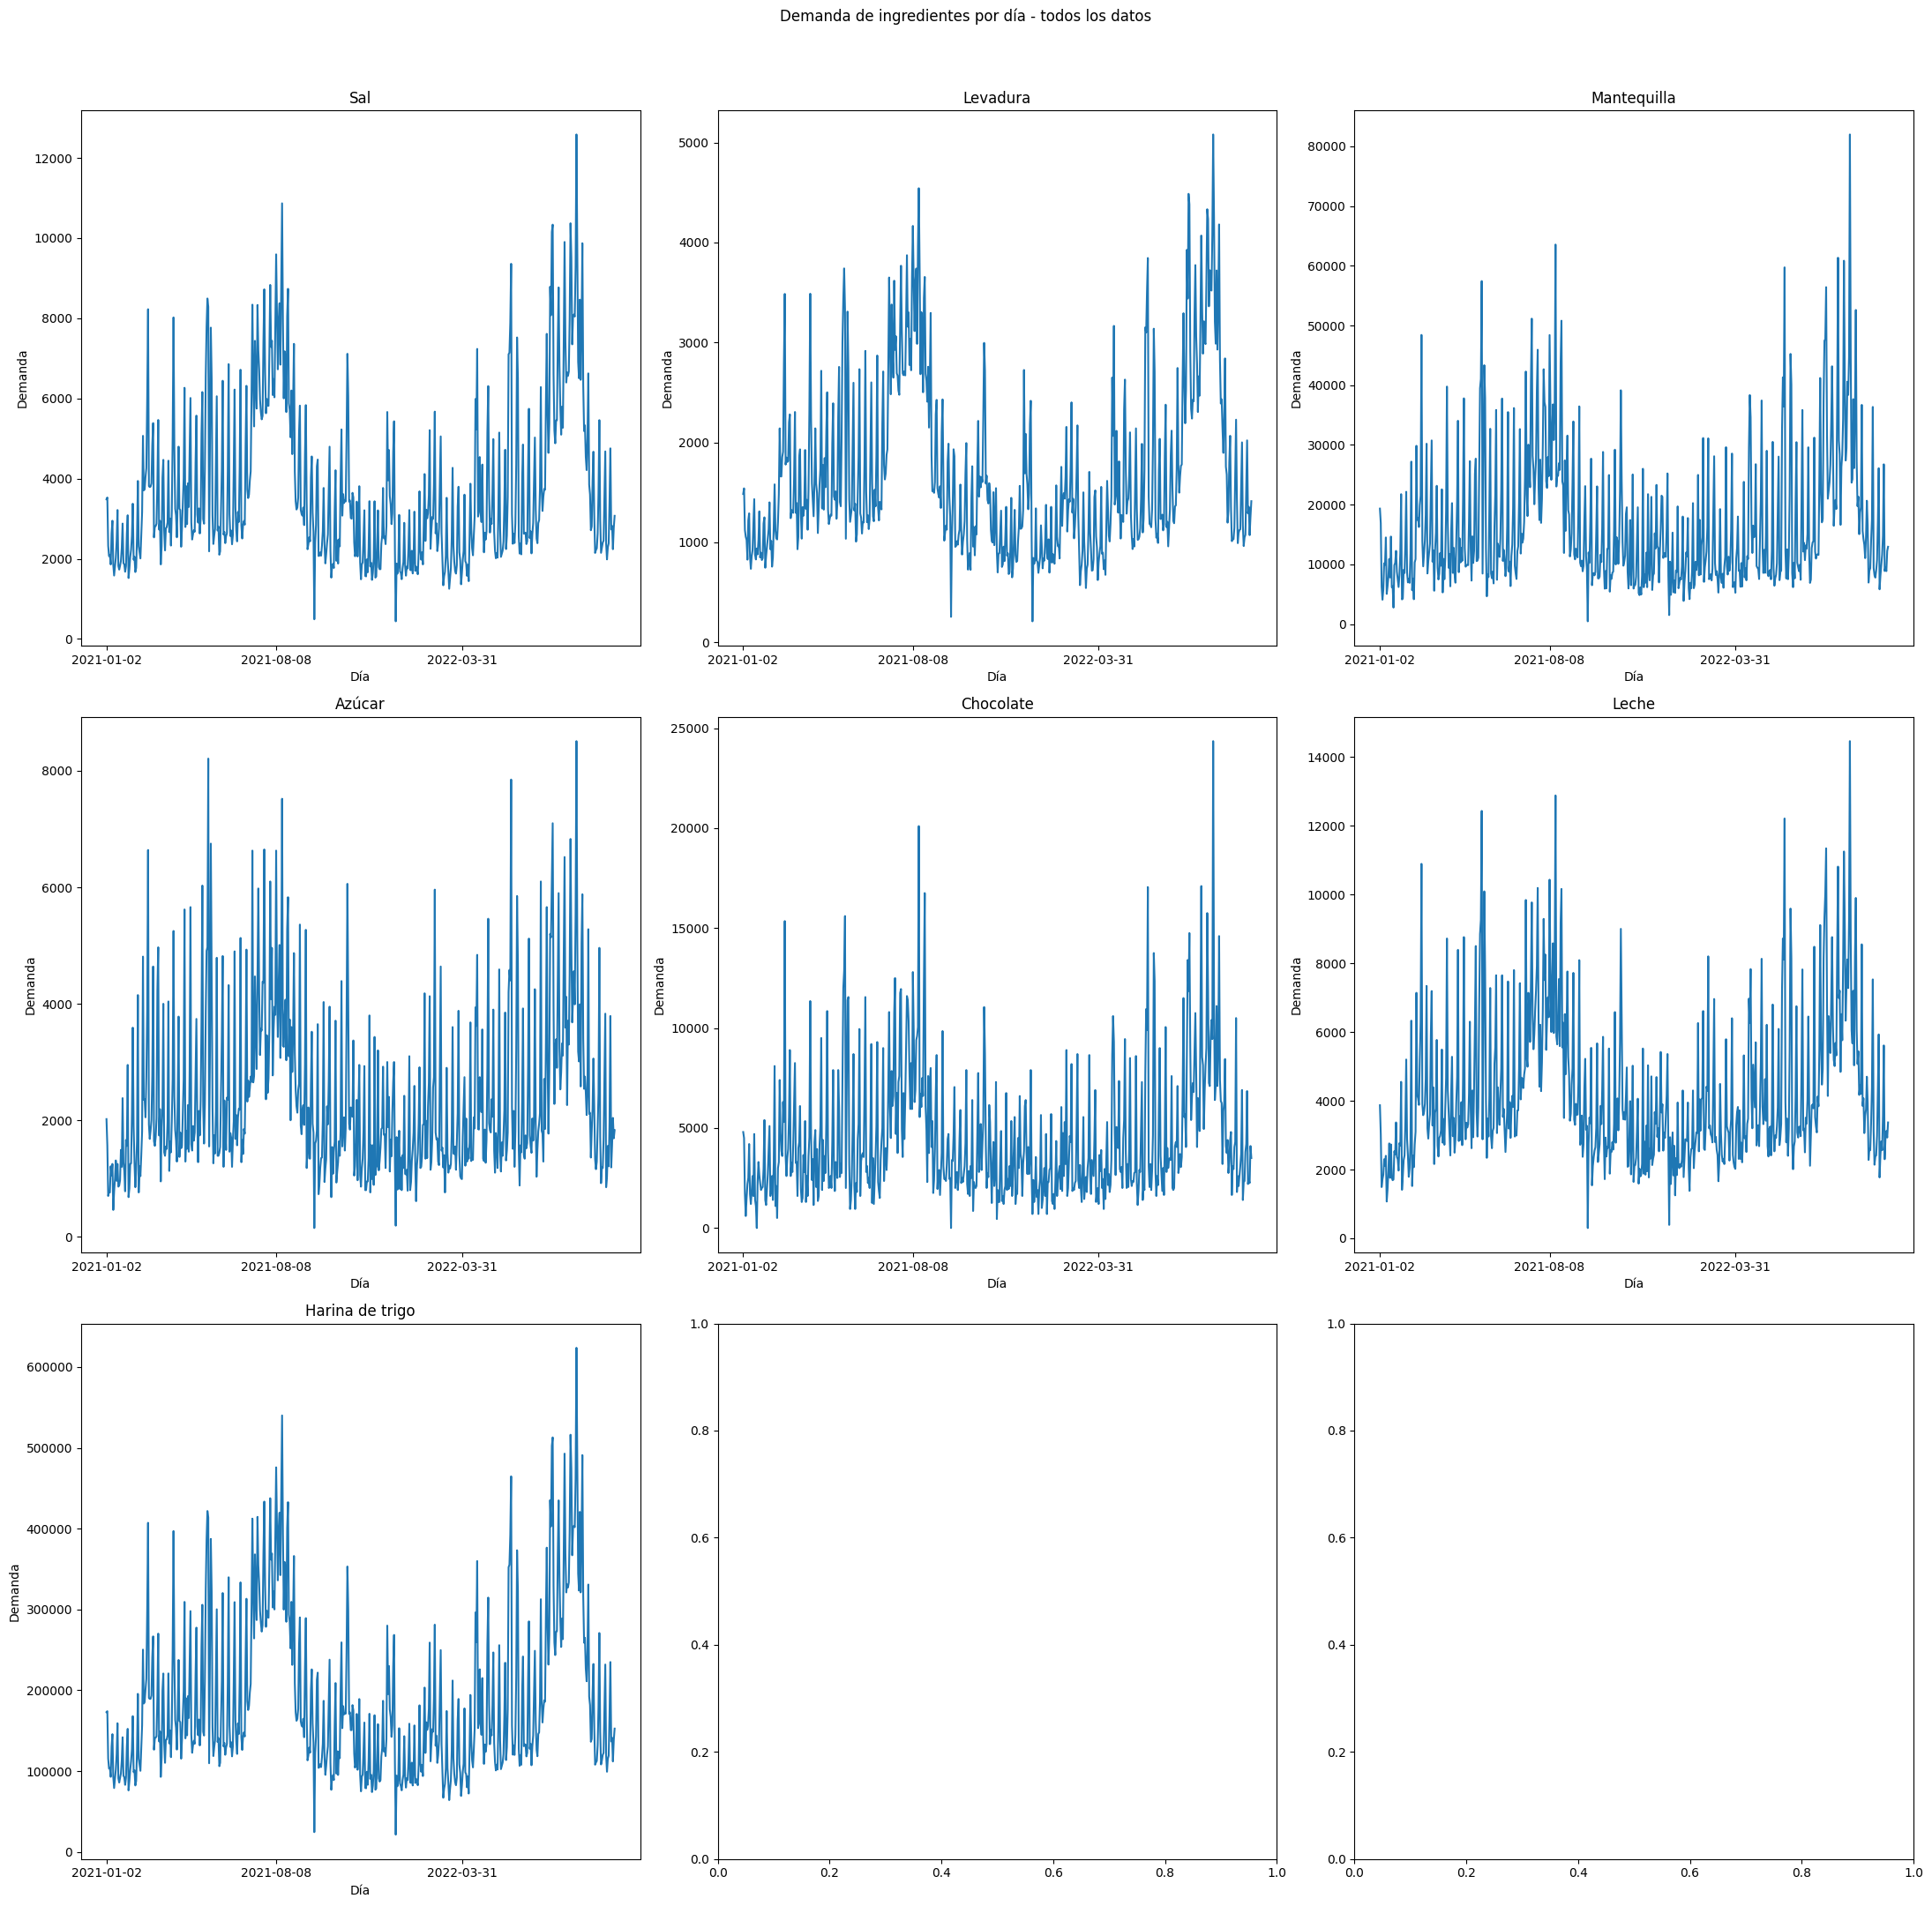

In [266]:
import math
import matplotlib.pyplot as plt

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente.columns) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(22, 22))

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente.columns):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_demanda_ingrediente.index, df_demanda_ingrediente[ingrediente])
    ax.set_title(ingrediente)
    ax.set_xlabel("Día")
    ax.set_ylabel("Demanda")
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], '2022-03-31'])
    ax.set_xticklabels([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], '2022-03-31'])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - todos los datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

## Pronostico de demanda de ingrediente

fuente https://forecastegy.com/posts/multiple-time-series-forecasting-with-holt-winters-in-python

In [268]:
if df_demanda_ingrediente.columns[0] != "ds":
    # "StatsForecast expects the data to have at least 3 columns: ds, unique_id, and y."
    # usar el indice default
    df_demanda_ingrediente = df_demanda_ingrediente.reset_index()
    df_demanda_ingrediente = df_demanda_ingrediente.rename(columns={"index": "ds"})
    df_demanda_ingrediente = df_demanda_ingrediente.melt(id_vars="ds", var_name="unique_id", value_name="y")

# "The model won’t work if you have zeros, negative, or missing values in the data."
# si hay un 0, se reemplaza por el promedio de los dos valores anteriores y siguientes
for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] == 0:
        df_demanda_ingrediente.loc[i, "y"] = (df_demanda_ingrediente.loc[i - 1, "y"] + df_demanda_ingrediente.loc[i + 1, "y"]) / 2

for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] < 1:
        print("Hay un 0 en el indice ", i)

df_demanda_ingrediente = df_demanda_ingrediente.sort_values(by="ds")

# ds debe ser tipo datetime
df_demanda_ingrediente['ds'] = pd.to_datetime(df_demanda_ingrediente['ds'])

df_demanda_ingrediente.head()

ds        unique_id         y
0    2021-01-02              Sal    3485.0
2400 2021-01-02        Chocolate    4800.0
1800 2021-01-02           Azúcar    2020.0
3600 2021-01-02  Harina de trigo  173000.0
600  2021-01-02         Levadura    1484.0

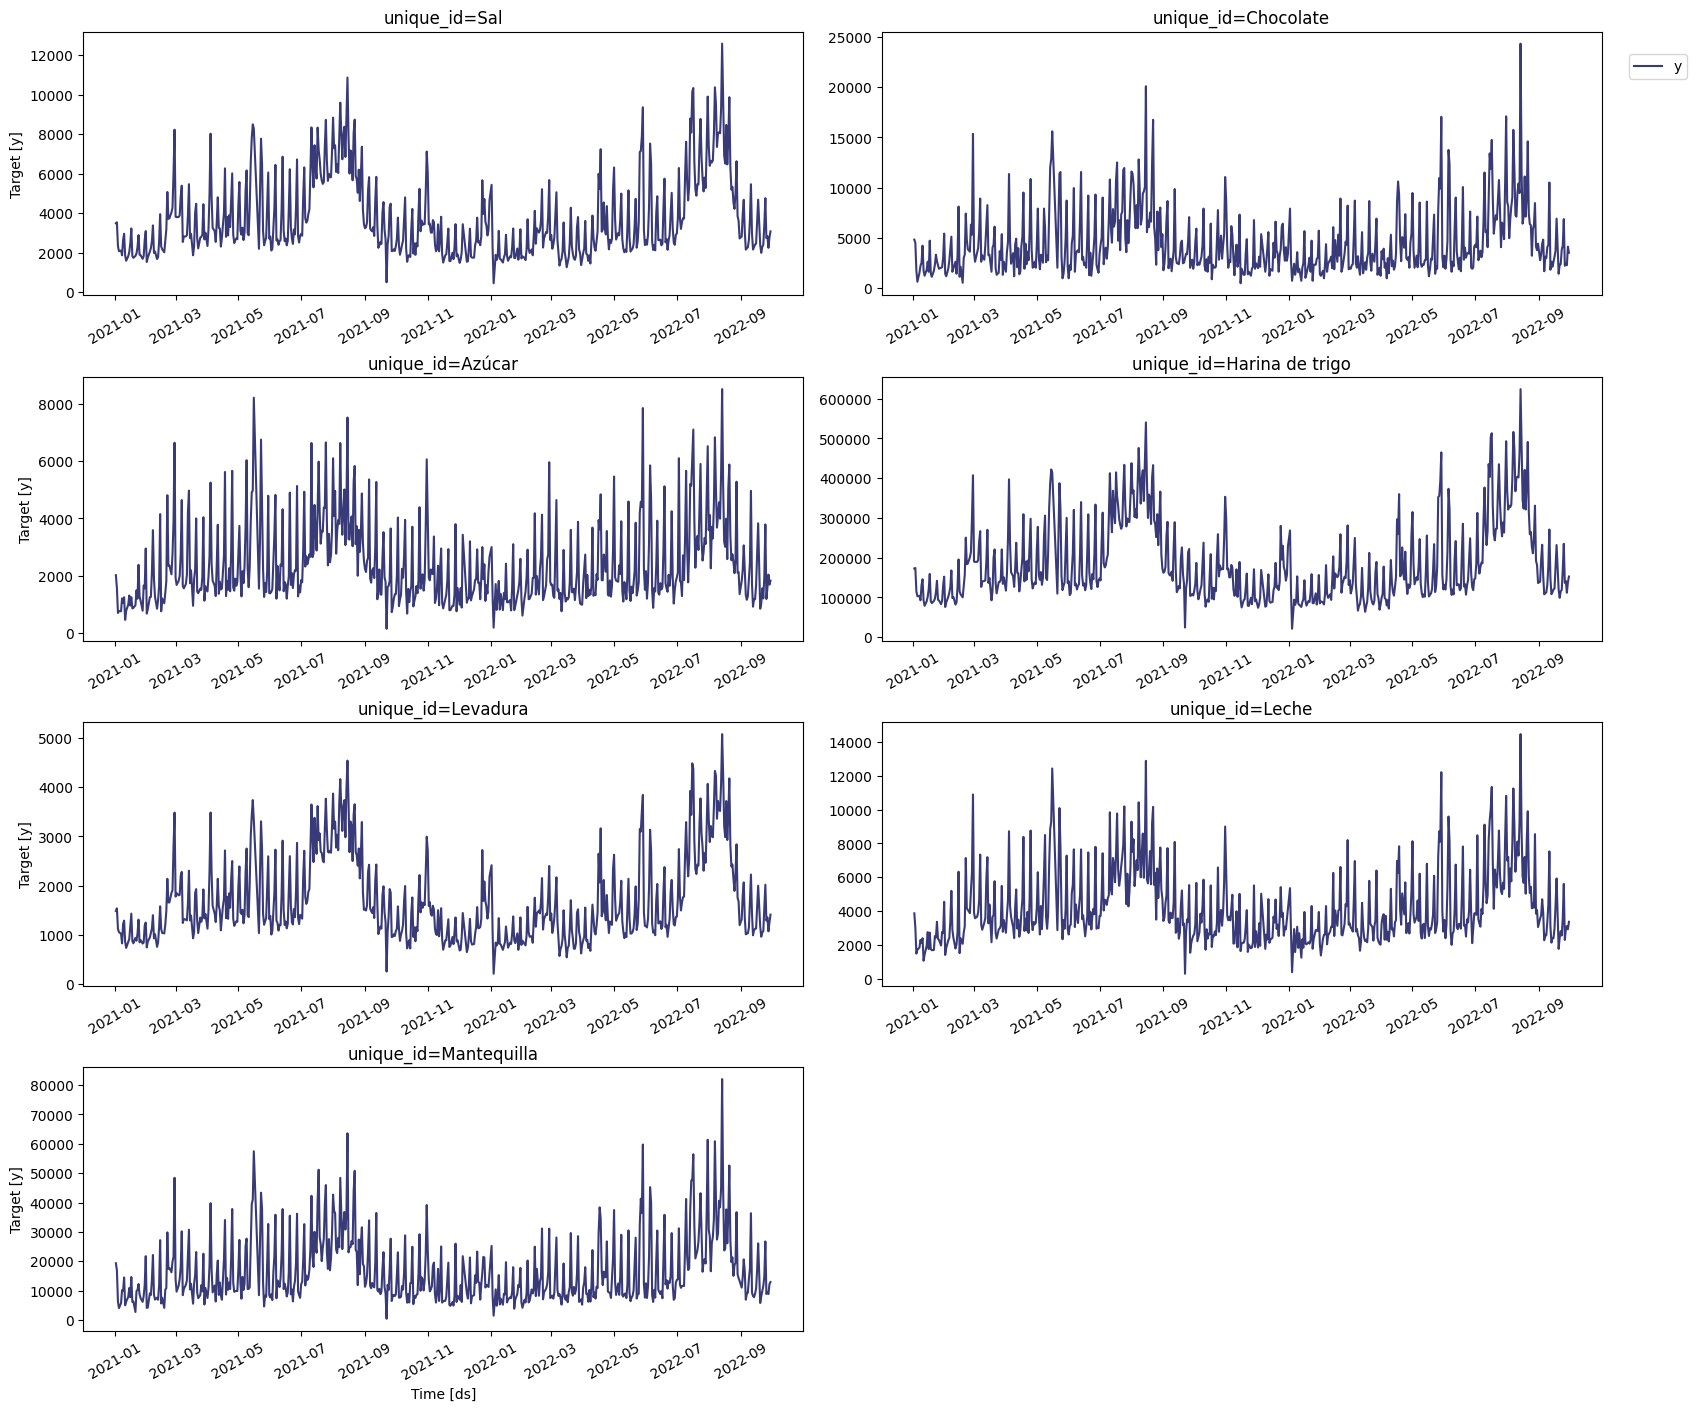

In [269]:
from statsforecast import StatsForecast

StatsForecast.plot(df_demanda_ingrediente)

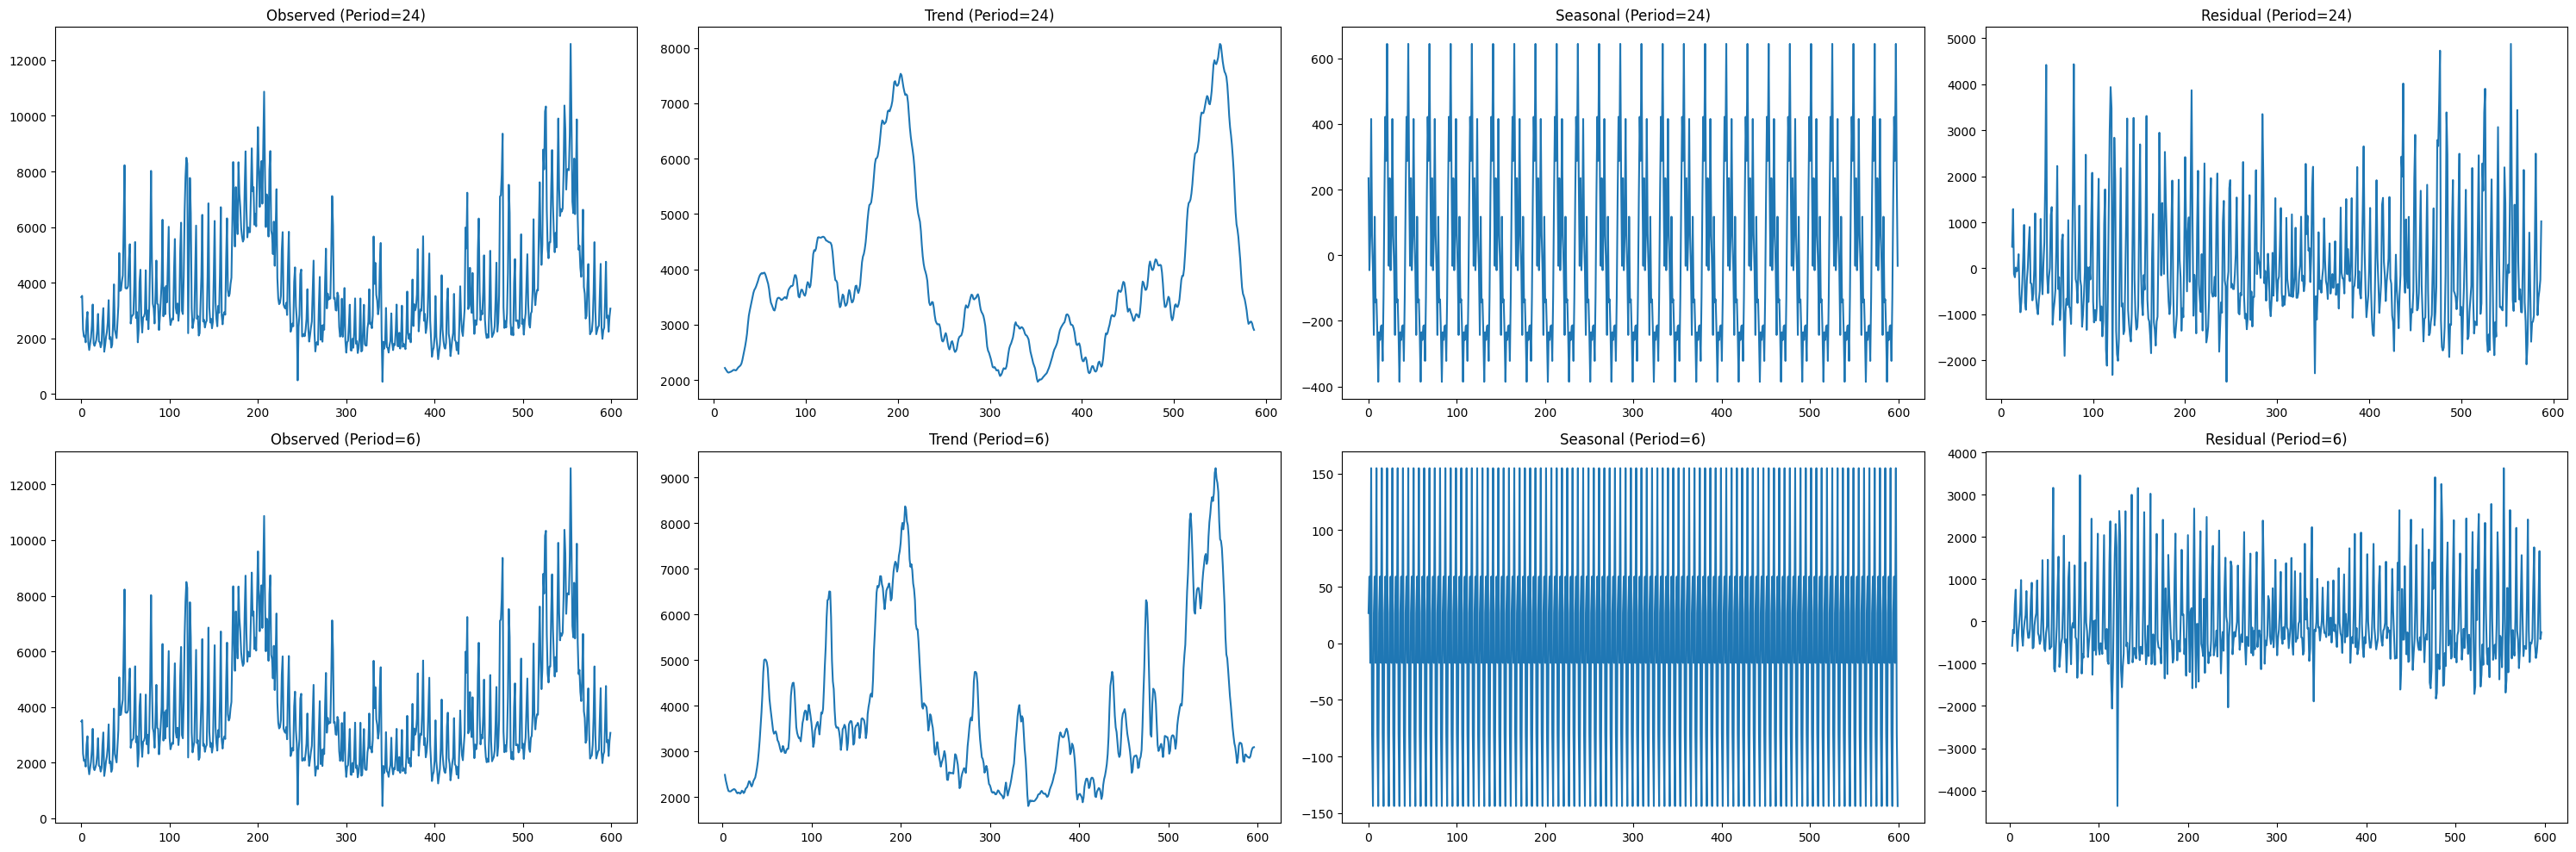

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

a = seasonal_decompose(df_demanda_ingrediente.loc[df_demanda_ingrediente["unique_id"] == "Sal"]["y"], model="additive", period=24)
# a.plot();
b = seasonal_decompose(df_demanda_ingrediente.loc[df_demanda_ingrediente["unique_id"] == "Sal"]["y"], model="additive", period=6)

fig, axs = plt.subplots(2, 4, figsize=(30, 10))

a.observed.plot(ax=axs[0, 0], title='Observed (Period=24)')
a.trend.plot(ax=axs[0, 1], title='Trend (Period=24)')
a.seasonal.plot(ax=axs[0, 2], title='Seasonal (Period=24)')
a.resid.plot(ax=axs[0, 3], title='Residual (Period=24)')

b.observed.plot(ax=axs[1, 0], title='Observed (Period=6)')
b.trend.plot(ax=axs[1, 1], title='Trend (Period=6)')
b.seasonal.plot(ax=axs[1, 2], title='Seasonal (Period=6)')
b.resid.plot(ax=axs[1, 3], title='Residual (Period=6)')

plt.tight_layout()
plt.show()

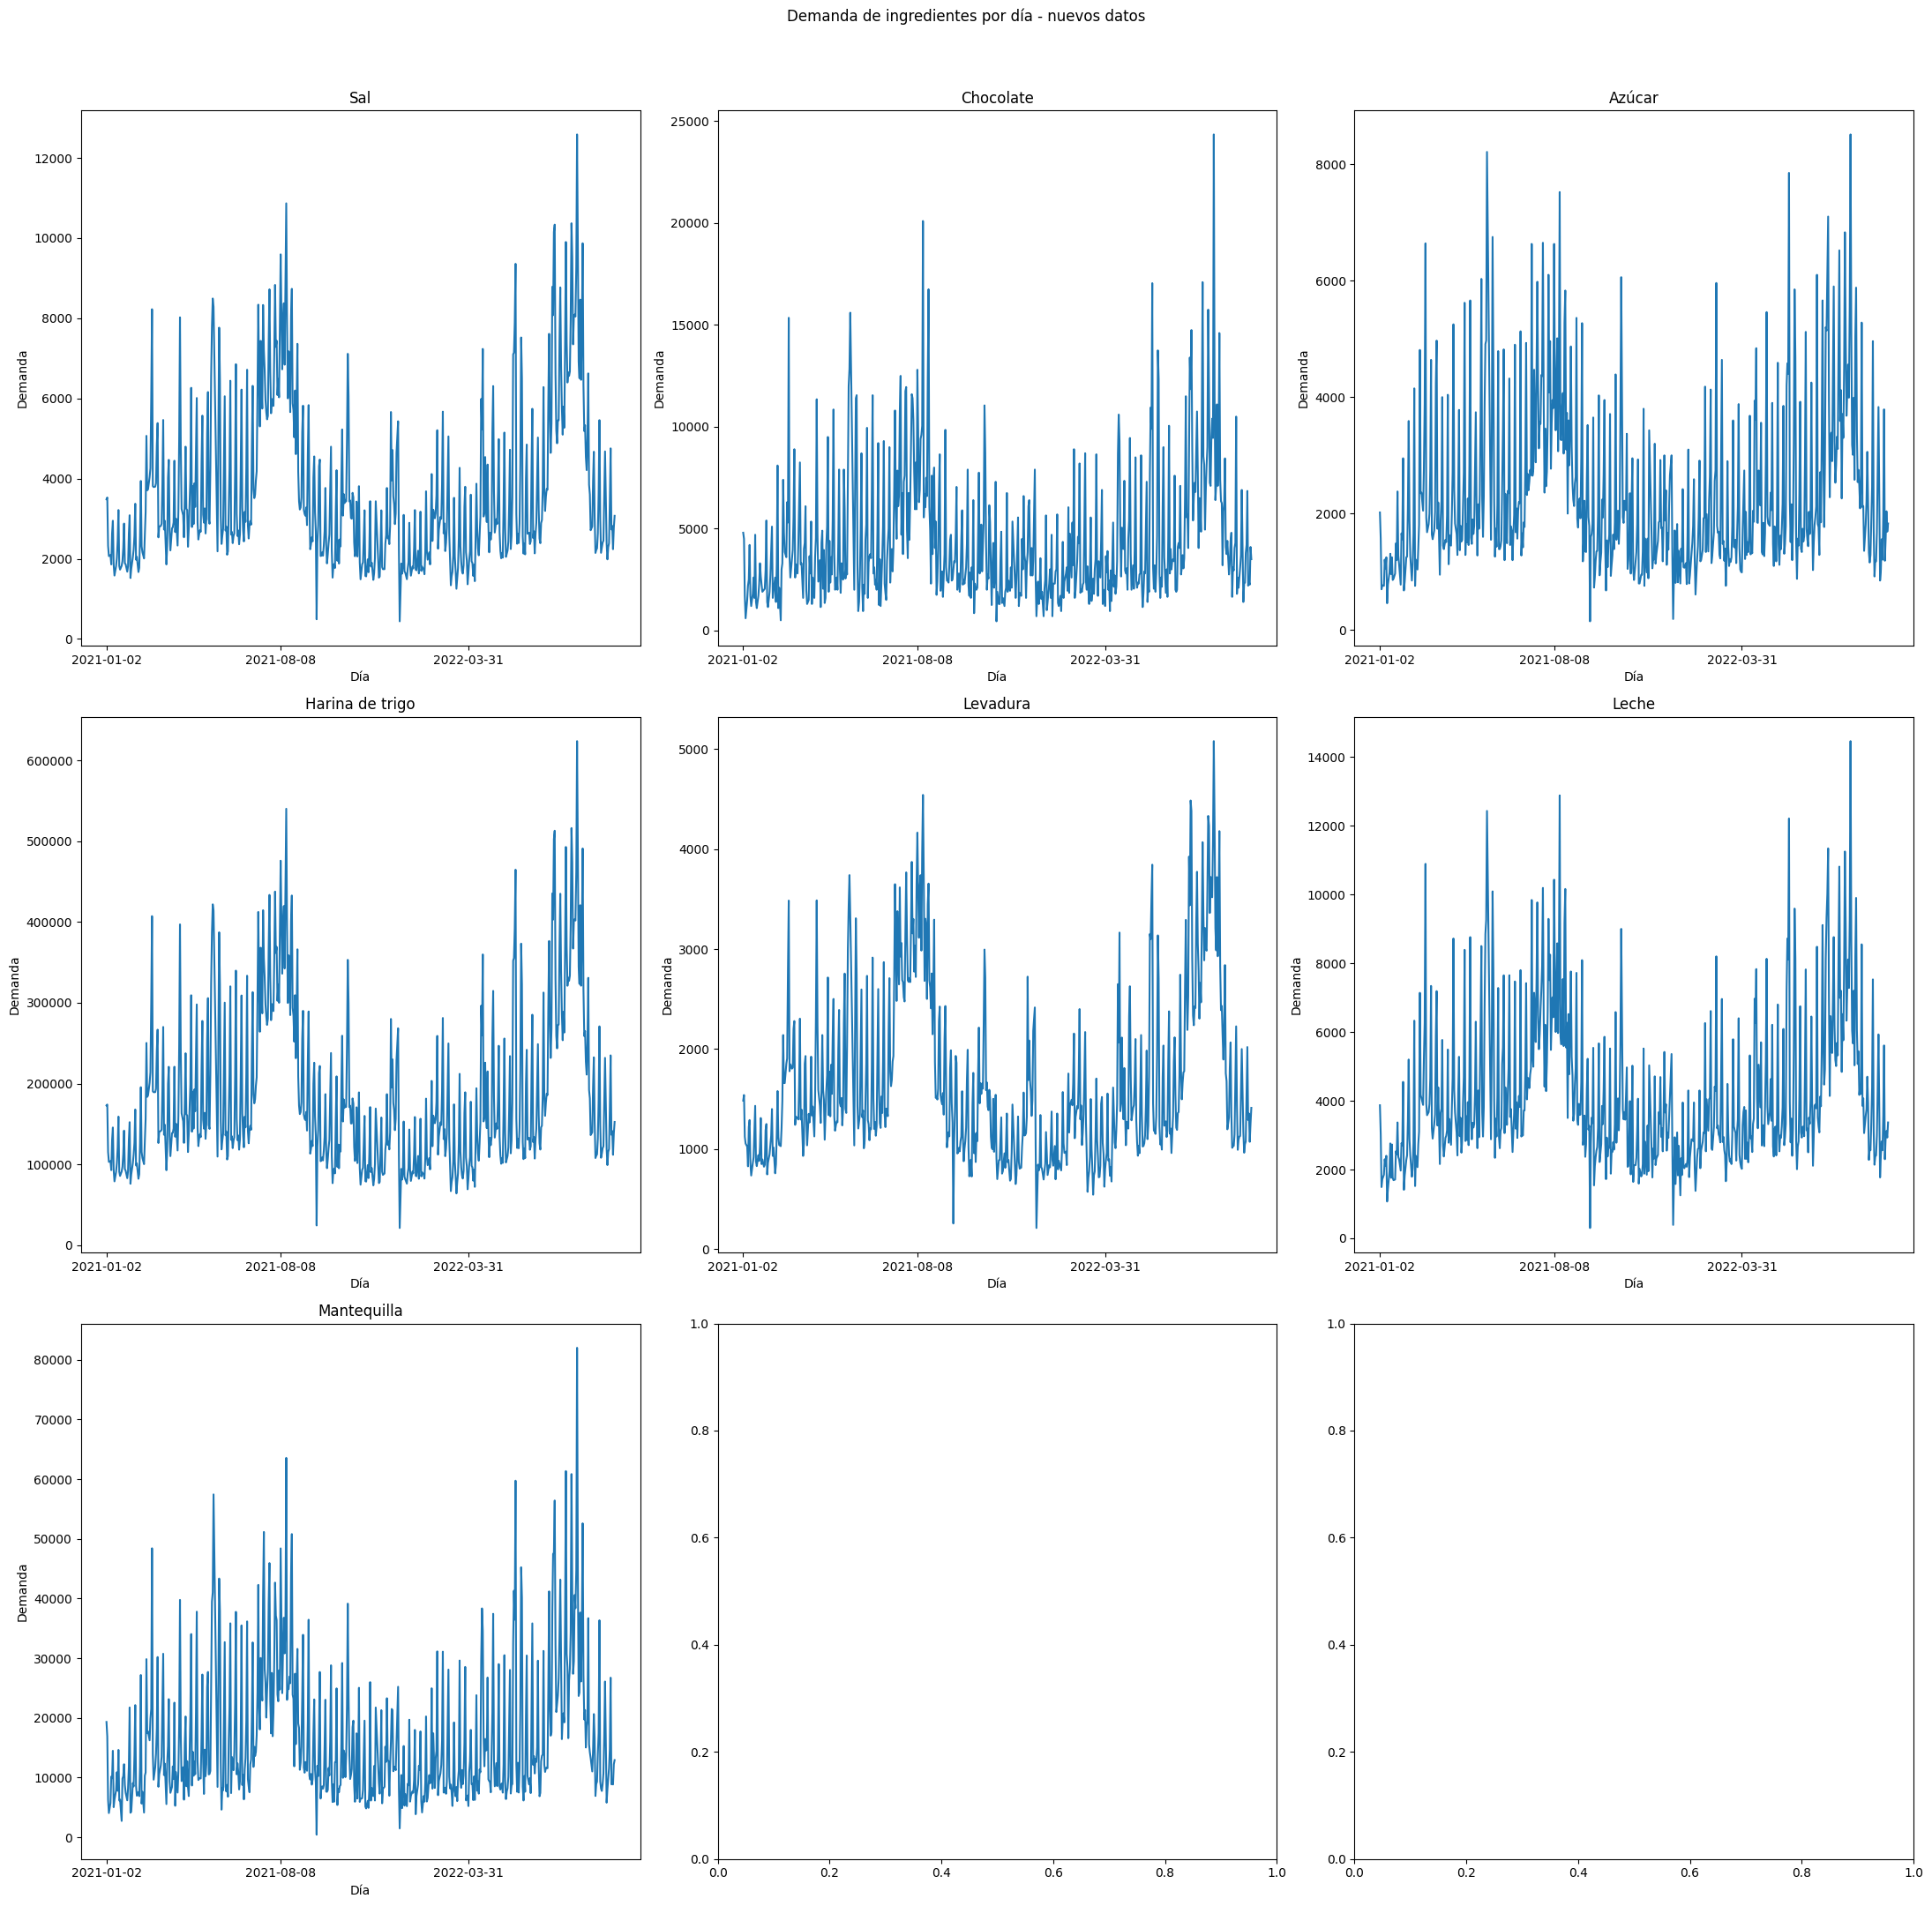

In [148]:
# Graficar las series de tiempo con los nuevos datos

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente['unique_id'].unique()) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(22, 22))

def isodate(t):
    return numpy.datetime_as_string(t, unit='D')

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente['unique_id'].unique()):
    ax = axs[i // n_c, i % n_c]
    df_ingrediente = df_demanda_ingrediente[df_demanda_ingrediente['unique_id'] == ingrediente]
    ax.plot(df_ingrediente['ds'], df_ingrediente['y'])
    ax.set_title(ingrediente)
    ax.set_xlabel("Día")
    ax.set_ylabel("Demanda")
    # Formatear las etiquetas de fecha
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])
    ax.set_xticklabels([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - nuevos datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

In [149]:
# los datos van desde 2021-01-02 a 2022-09-30. En 2022 solo tengo 3 trimestres por lo que tomo los ultimos 2 para validación. 
# Es decir, comienzo en 2021-01-02 y termino en 2022-03-31
datos = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] <= "2022-03-31"]
verificacion = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] > "2022-03-31"]
h = verificacion['ds'].nunique() # 180

print(f"h={h}")

from statsforecast import StatsForecast
from statsforecast.models import HoltWinters

model = StatsForecast(models=[HoltWinters(season_length=365, error_type='A', alias='HW_A'),
                              HoltWinters(season_length=365, error_type='M', alias='HW_M')], 
                              freq='D', n_jobs=-1)
model.fit(datos)

h=180


StatsForecast(models=[HW_A,HW_M])

> For example, data with daily observations might have a weekly seasonality (frequency=7) or an annual seasonality (frequency=365.25)
>
> https://robjhyndman.com/hyndsight/seasonal-periods/

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/home/ez/tmp/geckodriver/ipykernel_44432/2273270649.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p['y'] = p['y'].fillna(method='ffill')


  unique_id         ds         HW_A   HW_A-lo-90   HW_A-hi-90         HW_M  \
0    Azúcar 2022-04-01  4914.577260  1897.103383  7932.051136  5880.702276   
1    Azúcar 2022-04-02  1908.523775 -1108.951074  4925.998624  2083.583964   
2    Azúcar 2022-04-03  1827.722917 -1189.753316  4845.199150  1986.756614   
3    Azúcar 2022-04-04  1976.568157 -1040.909944  4994.046258  2183.062006   
4    Azúcar 2022-04-05  2295.414601  -722.065923  5312.895125  2597.842917   

     HW_M-lo-90    HW_M-hi-90  
0  -6849.681518  18611.086071  
1 -10646.799831  14813.967758  
2 -10743.627181  14717.140409  
3 -10547.321789  14913.445801  
4 -10132.540879  15328.226712  
   index unique_id         ds         HW_A   HW_A-lo-90   HW_A-hi-90  \
0      0    Azúcar 2022-04-01  4914.577260  1897.103383  7932.051136   
1      1    Azúcar 2022-04-02  1908.523775 -1108.951074  4925.998624   
2      2    Azúcar 2022-04-03  1827.722917 -1189.753316  4845.199150   
3      3    Azúcar 2022-04-04  1976.568157 -1040.90

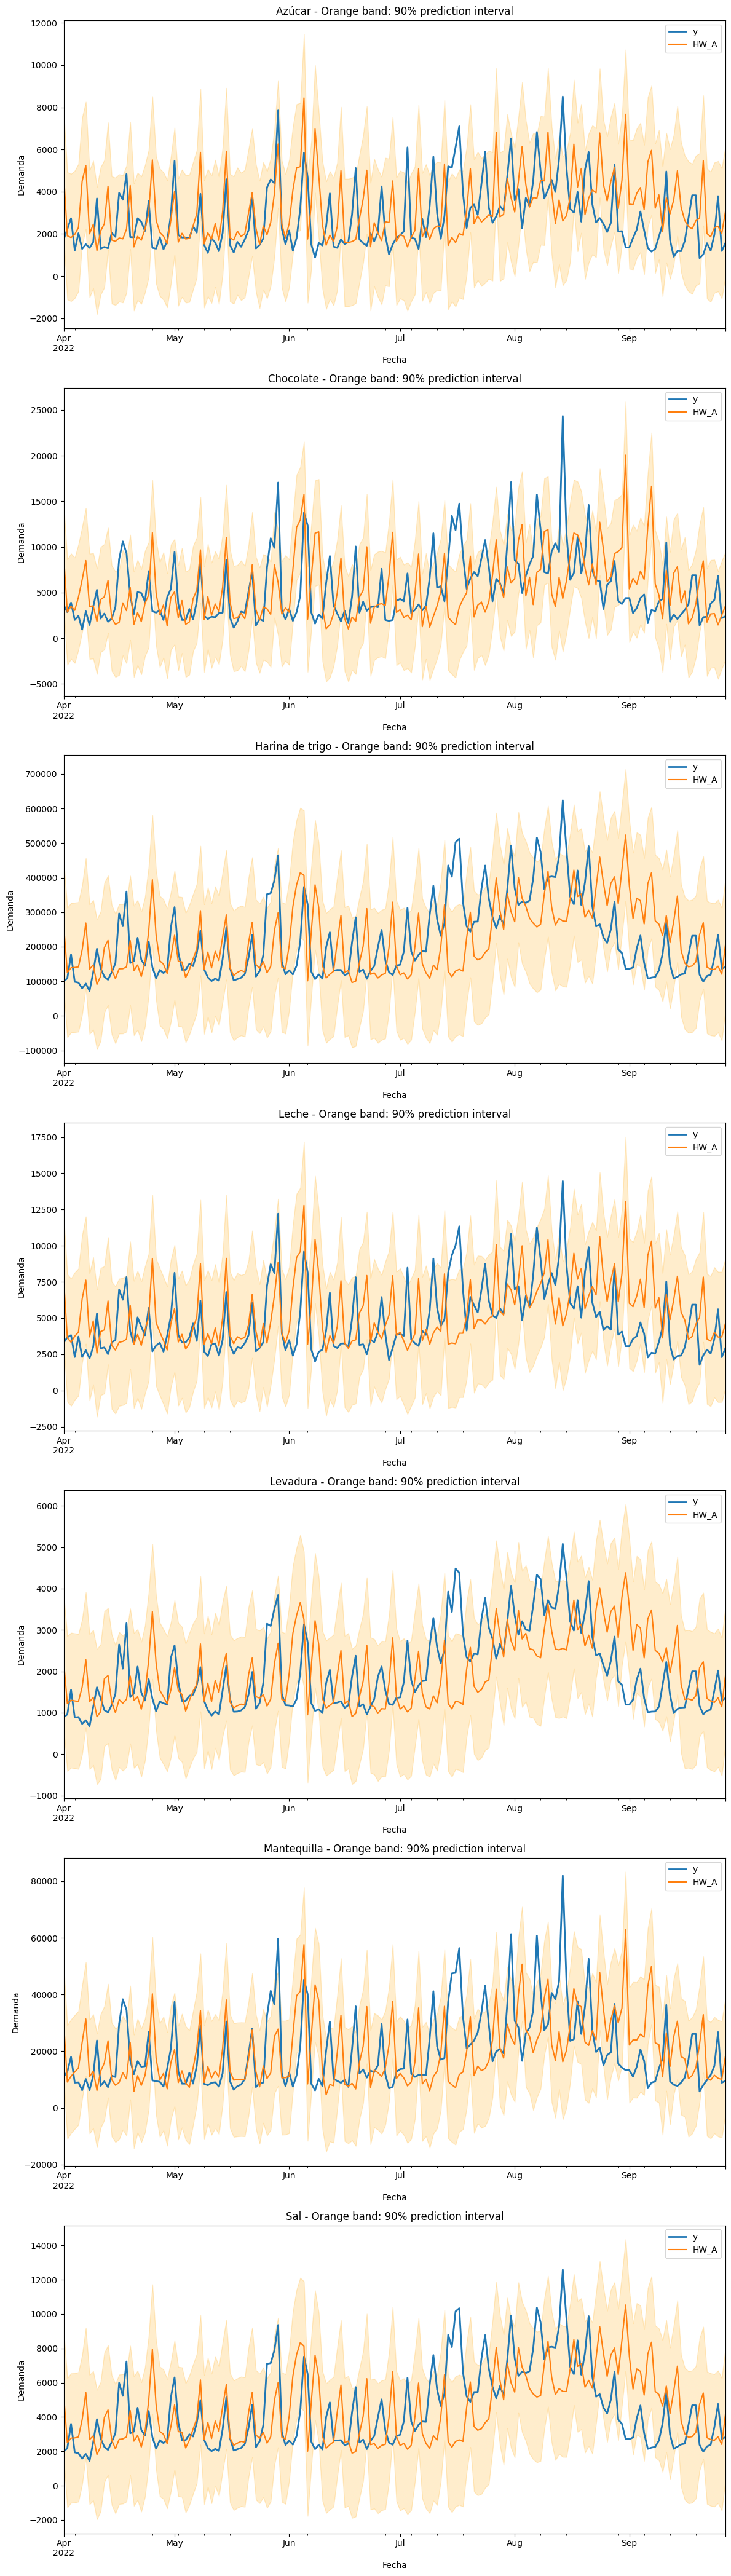

HW_M MAPE: 94.02%


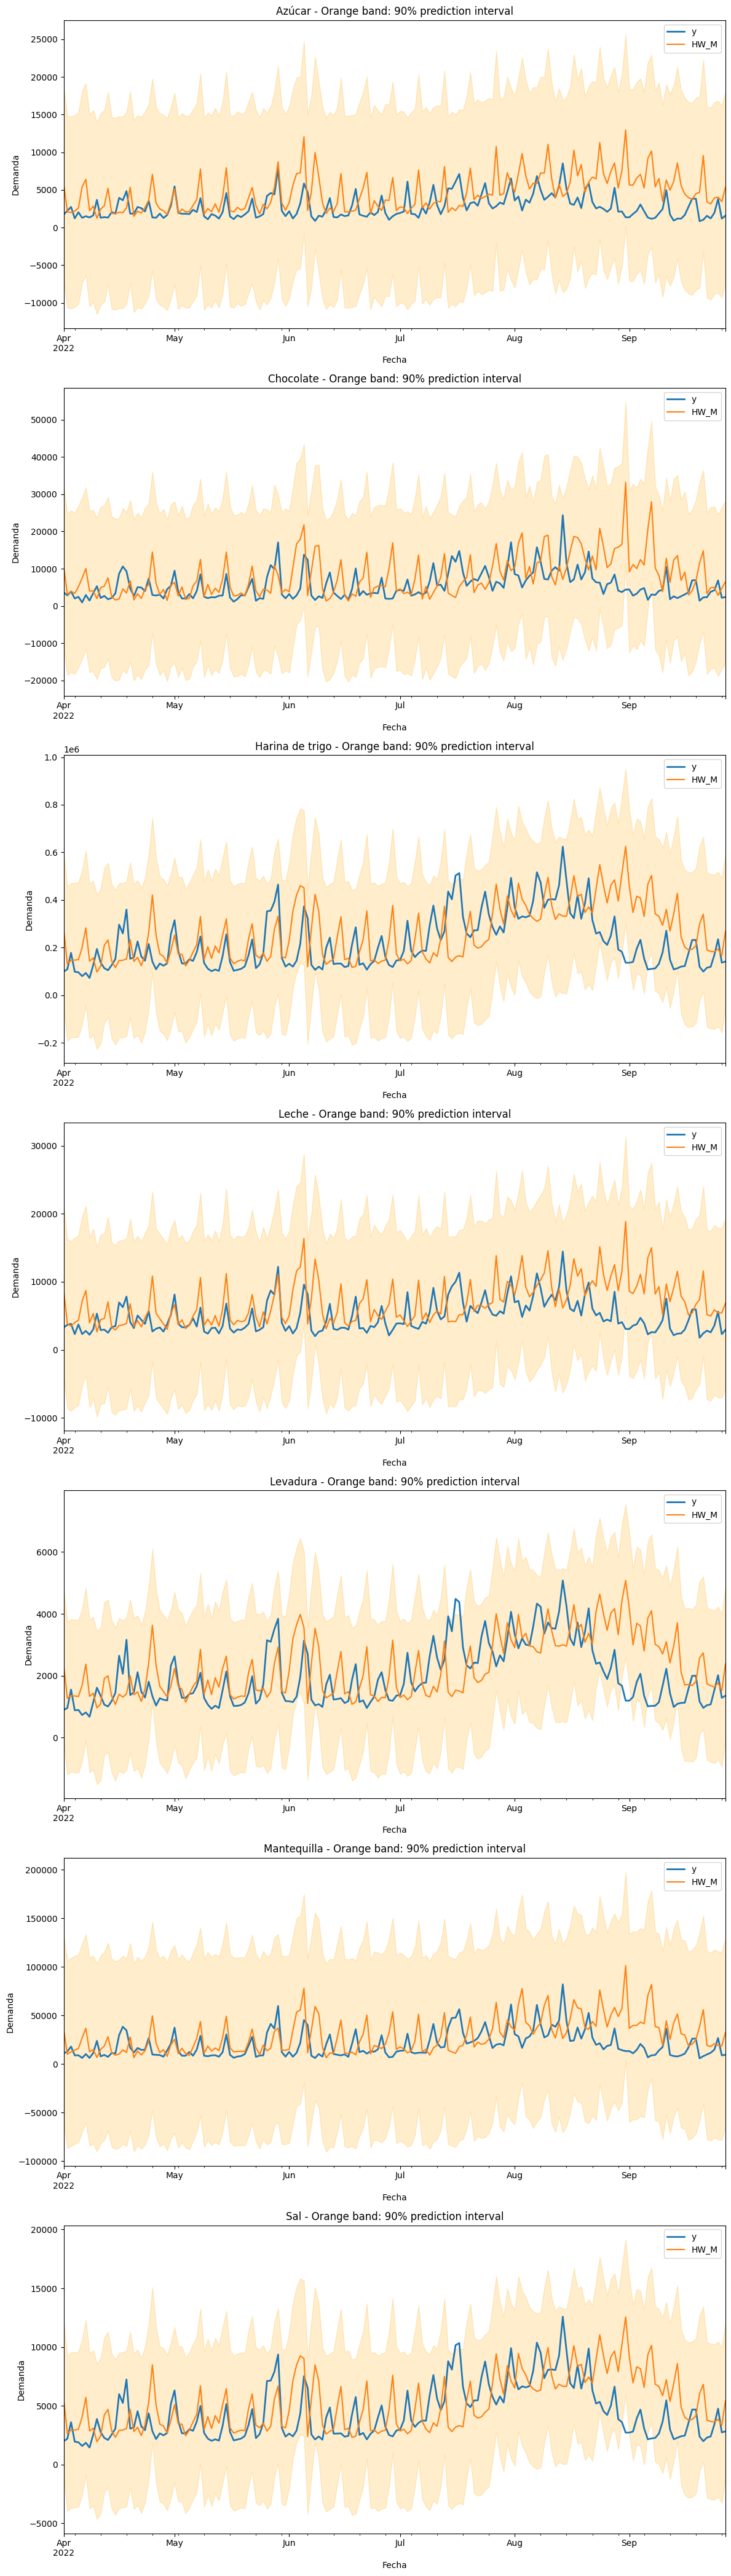

In [150]:
p = model.predict(h=h, level=[90])

print(p.reset_index().head())

p = p.reset_index().merge(verificacion, on=['ds', 'unique_id'], how='left')

print(p.reset_index().head())

# Fill NaN values in 'y' column with forward fill method
p['y'] = p['y'].fillna(method='ffill')

# plot
from sklearn.metrics import mean_absolute_percentage_error

unique_ids = p['unique_id'].unique()
num_unique_ids = len(unique_ids)

for model_ in ['HW_A', 'HW_M']:
    mape_ = mean_absolute_percentage_error(p['y'].values, p[model_].values)
    print(f'{model_} MAPE: {mape_:.2%}')
    fig, ax = plt.subplots(num_unique_ids, 1, figsize=(12, 6 * num_unique_ids))  # Increase height
    for ax_, device in enumerate(unique_ids):
        p_device = p[p['unique_id'] == device]
        p_device.plot(x='ds', y='y', ax=ax[ax_], label='y', title=device, linewidth=2)
        p_device.plot(x='ds', y=model_, ax=ax[ax_], label=model_)
        ax[ax_].set_xlabel('Fecha')
        ax[ax_].set_ylabel('Demanda')
        ax[ax_].fill_between(p_device['ds'].values,
                             p_device[f'{model_}-lo-90'], 
                             p_device[f'{model_}-hi-90'], 
                             alpha=0.2,
                             color='orange')
        ax[ax_].set_title(f'{device} - Orange band: 90% prediction interval')
        ax[ax_].legend()
    fig.tight_layout()
    plt.show()

TODO:
- [ ] Elegir entre additive y multiplicative
- [ ] Generar los gráficos completos (2021 hasta 2022-09 + pronostico hasta 2022-12) de los ingredientes
- [ ] Descomponer la serie de tiempo, por cada ingrediente